<a href="https://colab.research.google.com/github/sahayshivam/CarDekho-MLModel/blob/main/CaRdekhoData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.Problem Definition**
 The problem we will be exloring is **Regression**
# *Statement*:

Given car dekho Dataset  ,   predict the Price Of the Car 

---






##**2  Data**:
 The original Data is downloaded in a formated  from  [Kaggle](https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho).The originla Dataset contains two **.csv** Datafiles which combined To give a final Dataset which will be used to predict our Target variable .

---

## **3 Evaluation**
If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.
However, due to the nature of experimentation, the evaluation metric may change over time.

---
# **4 Features**:

#The following are the features we'll use to predict our target variable(Price of the cars)
  **1 Selling price** : selling_price in 3.35,4.47
  
  **2 km driven**   : km_driven in 70000,10000

  **3 fuel consumption** : fuel in pertol or Diesel

  **4seller type**: seller_type in Dealer or individual

  **5 Owner** : Owner in 0,1,"First owner",Second owner"

  **6 Transmission** : "Automatic","Mannual"

---

# **5 Prepearing Tools**

  Libraries play a important role in structuring our data,In this project the Libraries which are used are

  [pandas](https://pypi.org/project/pandas/) for data analysis.

  [NumPy](https://numpy.org/) for numerical operations.

  [Matplotlib](https://pypi.org/project/matplotlib/)/[seaborn](https://www.w3schools.com/python/numpy_random_seaborn.asp) for plotting or data visualization.

[Scikit-Learn](https://scikit-learn.org/) for machine learning modelling and evaluation.










### **Importing The dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **6: Importing Libraries**



In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
# sns.set_theme(style="ticks", color_codes=True)
import missingno as msno

### **7 : Load Or Read  Data from Dataset 1**

In [ ]:
# Reading Dataset
kaggle1= pd.read_csv("/content/drive/My Drive/kaggledataset/CAR DETAILS FROM CAR DEKHO.csv")
kaggle1.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


### **8: Load or read Data from Dataset 2**

In [ ]:
kaggle2 = pd.read_csv("/content/drive/My Drive/kaggledataset/car data.csv")
kaggle2.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### **9 :Exploratory analysis (EDA) on Dataset 1**

In [ ]:
kaggle1.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
kaggle1.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [ ]:
kaggle1.shape

(4340, 8)

In [ ]:
for i in kaggle1["selling_price"]:
  kaggle1["updated_selling_price"] = round(kaggle1["selling_price"]/100000 , 2)

In [ ]:
kaggle1.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,updated_selling_price
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,0.60
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,1.35
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,6.00
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,2.50
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,4.50


In [ ]:
kaggle1["owner"].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [ ]:
kaggle1.drop(['selling_price'] , axis=1 , inplace=True)
kaggle1.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,updated_selling_price
0,Maruti 800 AC,2007,70000,Petrol,Individual,Manual,First Owner,0.60
1,Maruti Wagon R LXI Minor,2007,50000,Petrol,Individual,Manual,First Owner,1.35
2,Hyundai Verna 1.6 SX,2012,100000,Diesel,Individual,Manual,First Owner,6.00
3,Datsun RediGO T Option,2017,46000,Petrol,Individual,Manual,First Owner,2.50
4,Honda Amaze VX i-DTEC,2014,141000,Diesel,Individual,Manual,Second Owner,4.50


In [ ]:
kaggle1.describe()

,year,km_driven,updated_selling_price
count,4340.000000,4340.000000,4340.000000
mean,2013.090783,66215.777419,5.041276
std,4.215344,46644.102194,5.785485
min,1992.000000,1.000000,0.200000
25%,2011.000000,35000.000000,2.087500
50%,2014.000000,60000.000000,3.500000
75%,2016.000000,90000.000000,6.000000
max,2020.000000,806599.000000,89.000000


In [ ]:
kaggle1.corr()

,year,km_driven,updated_selling_price
year,1.000000,-0.419688,0.413922
km_driven,-0.419688,1.000000,-0.192289
updated_selling_price,0.413922,-0.192289,1.000000


### **10 : Exploratory analysis (EDA) on Dataset 2**

In [ ]:
kaggle2.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
kaggle2.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [ ]:
kaggle2.shape

(301, 9)

In [ ]:
kaggle2.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [ ]:
kaggle2.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
kaggle2["Owner"].unique()

array([0, 1, 3])

##**11: Renaming the variables in order to append them**

Renaming the features of Datasets in order to append them and make a final Dataset

In [ ]:
kaggle2.rename(columns={'Car_Name': 'name', 'Year': 'year','Selling_Price':'selling_price','Kms_Driven':'km_driven','Fuel_Type':'fuel','Seller_Type':'seller_type','Transmission':'transmission', 'Owner':'owner'}, inplace=True)
kaggle2.rename(columns={'selling_price' : 'selling_price_updated'} , inplace=True)  # Updated code
kaggle2.rename(columns={'selling_price_updated' : 'updated_selling_price'} , inplace=True)  # Updated code
kaggle2.head()

,name,year,updated_selling_price,Present_Price,km_driven,fuel,seller_type,transmission,owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# **12: Appending the Two Dataset**

In [ ]:
kaggle_set = kaggle1.append(kaggle2)

In [ ]:
kaggle_set.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,updated_selling_price,Present_Price
0,Maruti 800 AC,2007,70000,Petrol,Individual,Manual,First Owner,0.60,NaN
1,Maruti Wagon R LXI Minor,2007,50000,Petrol,Individual,Manual,First Owner,1.35,NaN
2,Hyundai Verna 1.6 SX,2012,100000,Diesel,Individual,Manual,First Owner,6.00,NaN
3,Datsun RediGO T Option,2017,46000,Petrol,Individual,Manual,First Owner,2.50,NaN
4,Honda Amaze VX i-DTEC,2014,141000,Diesel,Individual,Manual,Second Owner,4.50,NaN


# **13: Exploratory analysis on The Final Dataset**

In [ ]:
kaggle_set.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,updated_selling_price,Present_Price
0,Maruti 800 AC,2007,70000,Petrol,Individual,Manual,First Owner,0.60,NaN
1,Maruti Wagon R LXI Minor,2007,50000,Petrol,Individual,Manual,First Owner,1.35,NaN
2,Hyundai Verna 1.6 SX,2012,100000,Diesel,Individual,Manual,First Owner,6.00,NaN
3,Datsun RediGO T Option,2017,46000,Petrol,Individual,Manual,First Owner,2.50,NaN
4,Honda Amaze VX i-DTEC,2014,141000,Diesel,Individual,Manual,Second Owner,4.50,NaN


In [ ]:
kaggle_set.columns

Index(['name', 'year', 'km_driven', 'fuel', 'seller_type', 'transmission',
       'owner', 'updated_selling_price', 'Present_Price'],
      dtype='object')

In [ ]:
kaggle_set.shape

(4641, 9)

In [ ]:
kaggle_set.dtypes

name                      object
year                       int64
km_driven                  int64
fuel                      object
seller_type               object
transmission              object
owner                     object
updated_selling_price    float64
Present_Price            float64
dtype: object

In [ ]:
kaggle_set["transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [ ]:
kaggle_set["owner"].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car', 0, 1, 3], dtype=object)

In [ ]:
kaggle_set['owner'] = kaggle_set['owner'].astype(str)
kaggle_set['owner'] = kaggle_set['owner'].replace(['0' , '1' , '3'],['Second Owner','Third Owner','Test Drive Car'])

In [ ]:
kaggle_set['owner'].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [ ]:
kaggle_set.shape

(4641, 9)

In [ ]:
kaggle_set.tail()

,name,year,km_driven,fuel,seller_type,transmission,owner,updated_selling_price,Present_Price
296,city,2016,33988,Diesel,Dealer,Manual,Second Owner,9.50,11.6
297,brio,2015,60000,Petrol,Dealer,Manual,Second Owner,4.00,5.9
298,city,2009,87934,Petrol,Dealer,Manual,Second Owner,3.35,11.0
299,city,2017,9000,Diesel,Dealer,Manual,Second Owner,11.50,12.5
300,brio,2016,5464,Petrol,Dealer,Manual,Second Owner,5.30,5.9


In [ ]:
kaggle_set.reset_index(drop = True,inplace=True)

In [ ]:
kaggle_set.tail()

,name,year,km_driven,fuel,seller_type,transmission,owner,updated_selling_price,Present_Price
4636,city,2016,33988,Diesel,Dealer,Manual,Second Owner,9.50,11.6
4637,brio,2015,60000,Petrol,Dealer,Manual,Second Owner,4.00,5.9
4638,city,2009,87934,Petrol,Dealer,Manual,Second Owner,3.35,11.0
4639,city,2017,9000,Diesel,Dealer,Manual,Second Owner,11.50,12.5
4640,brio,2016,5464,Petrol,Dealer,Manual,Second Owner,5.30,5.9


No handles with labels found to put in legend.


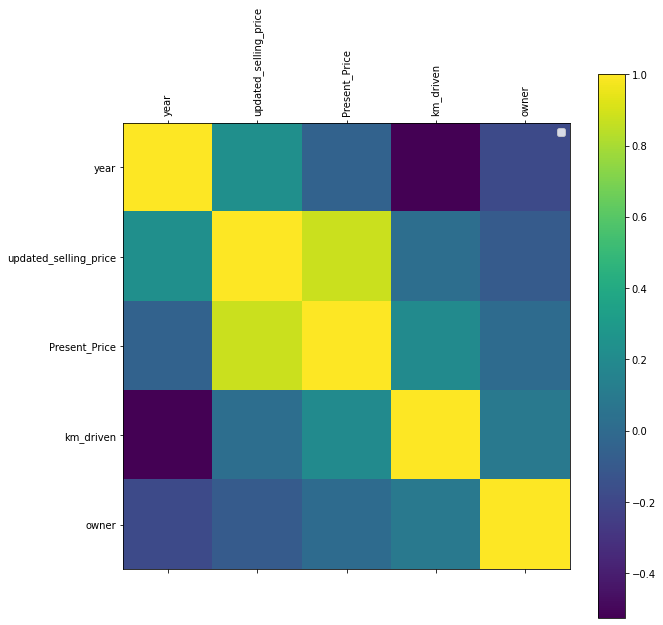

In [ ]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
    
plot_corr(kaggle2)

In [ ]:
kaggle2.columns

Index(['name', 'year', 'updated_selling_price', 'Present_Price', 'km_driven',
       'fuel', 'seller_type', 'transmission', 'owner'],
      dtype='object')

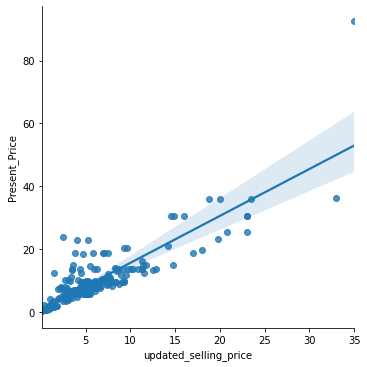

In [ ]:
sns.lmplot(data = kaggle2 , x='updated_selling_price' , y='Present_Price')
plt.show()

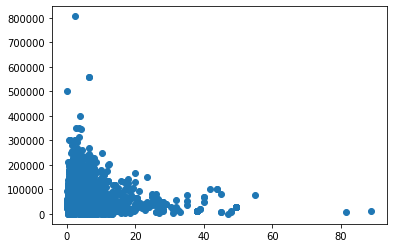

In [ ]:
plt.scatter(kaggle_set["updated_selling_price"],kaggle_set["km_driven"])
plt.show()

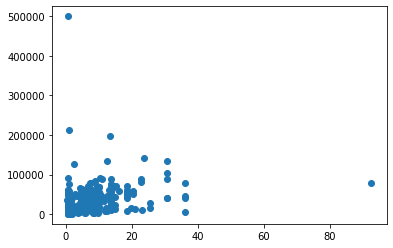

In [ ]:
plt.scatter(kaggle2["Present_Price"],kaggle2["km_driven"])
plt.show()

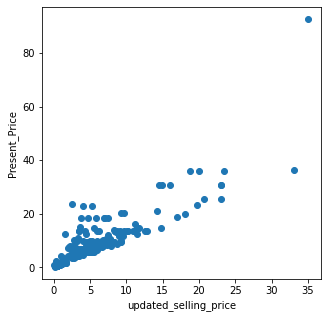

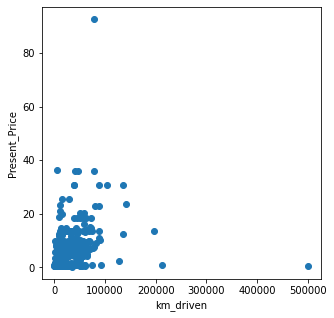

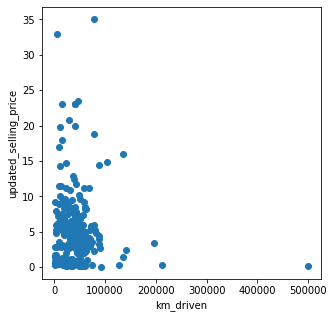

In [ ]:
def scatter_plot (x,y,size = 5):
  fig, ax = plt.subplots(figsize=(size, size))
  plt.scatter(kaggle2[x],kaggle2[y])
  plt.xlabel(x)
  plt.ylabel(y)
  plt.show()

scatter_plot("updated_selling_price","Present_Price")
scatter_plot("km_driven","Present_Price") 
scatter_plot("km_driven","updated_selling_price")
  

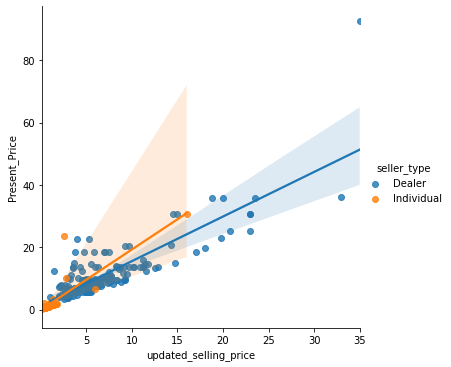

In [ ]:
sns.lmplot(data=kaggle2, x='updated_selling_price' , y='Present_Price' , hue='seller_type')

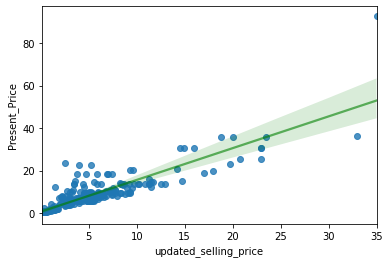

In [ ]:
sns.regplot(x=kaggle2['updated_selling_price'] , y=kaggle2['Present_Price'] , line_kws = {'color':'g' , 'alpha':0.6})

##**visualising the missing Values**

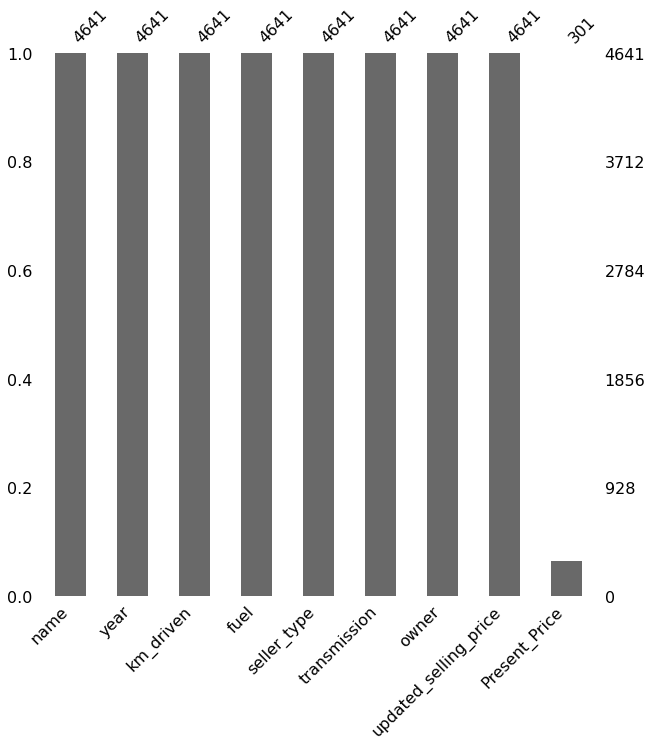

In [ ]:
msno.bar(kaggle_set,figsize = (10,10))

In [ ]:
## msno.heatmap( kaggle_set,figsize = (15,10)) 
## corr between the msissing values

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


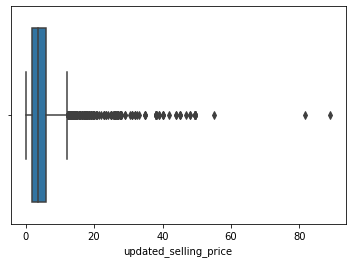

In [ ]:
#Finding Outliers
sns.boxplot(kaggle_set["updated_selling_price"])

In [ ]:
# Removing Outliers
from scipy import stats
z = np.abs(stats.zscore(kaggle_set["updated_selling_price"]))
print(z)

[0.76915737 0.63854472 0.1712537  ... 0.29024433 1.12907979 0.04934856]


In [ ]:
np.where(z>10)

(array([  89, 3872]),)

In [ ]:
kaggle_set["fuel"].value_counts()

Petrol      2362
Diesel      2213
CNG           42
LPG           23
Electric       1
Name: fuel, dtype: int64

In [ ]:
kaggle_set[kaggle_set['fuel']=='Electric']

,name,year,km_driven,fuel,seller_type,transmission,owner,updated_selling_price,Present_Price
4145,Toyota Camry Hybrid,2006,62000,Electric,Dealer,Automatic,Second Owner,3.1,NaN


In [ ]:
kaggle_set.shape

(4641, 9)

In [ ]:
kaggle_set.loc[[101]]

,name,year,km_driven,fuel,seller_type,transmission,owner,updated_selling_price,Present_Price
101,Mercedes-Benz E-Class Exclusive E 200 BSIV,2018,9800,Petrol,Dealer,Automatic,First Owner,45.0,NaN


In [ ]:
print(z[101])

6.963111414594804


In [ ]:
kaggle_set = kaggle_set.drop(index = [89,3872]) 

In [ ]:
kaggle_set.shape

(4639, 9)

In [ ]:
kaggle_set.tail()

,name,year,km_driven,fuel,seller_type,transmission,owner,updated_selling_price,Present_Price
4636,city,2016,33988,Diesel,Dealer,Manual,Second Owner,9.50,11.6
4637,brio,2015,60000,Petrol,Dealer,Manual,Second Owner,4.00,5.9
4638,city,2009,87934,Petrol,Dealer,Manual,Second Owner,3.35,11.0
4639,city,2017,9000,Diesel,Dealer,Manual,Second Owner,11.50,12.5
4640,brio,2016,5464,Petrol,Dealer,Manual,Second Owner,5.30,5.9


###**Finding missing values and filling them**


In [ ]:
kaggle_set.isnull().sum()

name                        0
year                        0
km_driven                   0
fuel                        0
seller_type                 0
transmission                0
owner                       0
updated_selling_price       0
Present_Price            4338
dtype: int64

In [ ]:
kaggle_set[["updated_selling_price","Present_Price"]]

,updated_selling_price,Present_Price
0,0.60,NaN
1,1.35,NaN
2,6.00,NaN
3,2.50,NaN
4,4.50,NaN
...,...,...
4636,9.50,11.6
4637,4.00,5.9
4638,3.35,11.0
4639,11.50,12.5


# **14. Filling Values using Statistical Imputation**

###Statistical Imputation is basically Mean,Median&Mode

In [ ]:
kaggle_set["updated_selling_price"].mean()

4.982041388230236

In [ ]:
median = kaggle2['Present_Price'].median()
median

6.4

In [ ]:
kaggle_set.mode(numeric_only = True)

,year,km_driven,updated_selling_price,Present_Price
0,2017,70000,3.0,9.4


In [ ]:
kaggle_median = kaggle_set.copy()
kaggle_median['Present_Price'] = kaggle_median['Present_Price'].fillna(median)
kaggle_median.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,updated_selling_price,Present_Price
0,Maruti 800 AC,2007,70000,Petrol,Individual,Manual,First Owner,0.60,6.4
1,Maruti Wagon R LXI Minor,2007,50000,Petrol,Individual,Manual,First Owner,1.35,6.4
2,Hyundai Verna 1.6 SX,2012,100000,Diesel,Individual,Manual,First Owner,6.00,6.4
3,Datsun RediGO T Option,2017,46000,Petrol,Individual,Manual,First Owner,2.50,6.4
4,Honda Amaze VX i-DTEC,2014,141000,Diesel,Individual,Manual,Second Owner,4.50,6.4


In [ ]:
kaggle_median.isnull().sum()

name                     0
year                     0
km_driven                0
fuel                     0
seller_type              0
transmission             0
owner                    0
updated_selling_price    0
Present_Price            0
dtype: int64

#  **15. Filling the values by regression imputation**

In [ ]:
#First we will convert the nominal  value by one hot encoding
categorial = ['fuel' , 'seller_type' , 'transmission' , 'owner']
kaggle_set = pd.get_dummies(kaggle_set, columns=categorial, drop_first=True)
kaggle_set.drop(['name'] , axis=1 , inplace=True)
kaggle_set.head()

,year,km_driven,updated_selling_price,Present_Price,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,70000,0.60,NaN,0,0,0,1,1,0,1,0,0,0,0
1,2007,50000,1.35,NaN,0,0,0,1,1,0,1,0,0,0,0
2,2012,100000,6.00,NaN,1,0,0,0,1,0,1,0,0,0,0
3,2017,46000,2.50,NaN,0,0,0,1,1,0,1,0,0,0,0
4,2014,141000,4.50,NaN,1,0,0,0,1,0,1,0,1,0,0


In [ ]:
from sklearn.linear_model import LinearRegression
np.random.seed(48)
test_data = kaggle_set[kaggle_set['Present_Price'].isnull()]
kaggle_set.dropna(inplace=True)

In [ ]:
kaggle_set

,year,km_driven,updated_selling_price,Present_Price,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
4340,2014,27000,3.35,5.59,0,0,0,1,0,0,1,0,1,0,0
4341,2013,43000,4.75,9.54,1,0,0,0,0,0,1,0,1,0,0
4342,2017,6900,7.25,9.85,0,0,0,1,0,0,1,0,1,0,0
4343,2011,5200,2.85,4.15,0,0,0,1,0,0,1,0,1,0,0
4344,2014,42450,4.60,6.87,1,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4636,2016,33988,9.50,11.60,1,0,0,0,0,0,1,0,1,0,0
4637,2015,60000,4.00,5.90,0,0,0,1,0,0,1,0,1,0,0
4638,2009,87934,3.35,11.00,0,0,0,1,0,0,1,0,1,0,0
4639,2017,9000,11.50,12.50,1,0,0,0,0,0,1,0,1,0,0


In [ ]:
test_data.tail()

,year,km_driven,updated_selling_price,Present_Price,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
4335,2014,80000,4.10,NaN,1,0,0,0,1,0,1,0,1,0,0
4336,2014,80000,4.10,NaN,1,0,0,0,1,0,1,0,1,0,0
4337,2009,83000,1.10,NaN,0,0,0,1,1,0,1,0,1,0,0
4338,2016,90000,8.65,NaN,1,0,0,0,1,0,1,0,0,0,0
4339,2016,40000,2.25,NaN,0,0,0,1,1,0,1,0,0,0,0


In [ ]:
y_train =kaggle_set["Present_Price"]
x_train =kaggle_set.drop('Present_Price' , axis=1) 

In [ ]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

The score or the value after applying LinearRegression to the train Data is 0.8536

In [ ]:
model.score(x_train,y_train)

0.8536117213973266

In [ ]:
kaggle_median.isnull().sum()

name                     0
year                     0
km_driven                0
fuel                     0
seller_type              0
transmission             0
owner                    0
updated_selling_price    0
Present_Price            0
dtype: int64

#**16 . Filling Values by Mice algorithm**

In [ ]:
##Perform One Hot Encoding on nominal value
cd = kaggle_set.copy(deep=True)
categorial = ['fuel_Petrol' , 'seller_type_Individual' , 'transmission_Manual' , 'owner_Second Owner']
cd = pd.get_dummies(cd, columns=categorial, drop_first=True)
cd.drop(['fuel_Electric'] , axis=1 , inplace=True)
cd.head()

,year,km_driven,updated_selling_price,Present_Price,fuel_Diesel,fuel_LPG,seller_type_Trustmark Dealer,owner_Fourth & Above Owner,owner_Test Drive Car,owner_Third Owner,fuel_Petrol_1,seller_type_Individual_1,transmission_Manual_1,owner_Second Owner_1
4340,2014,27000,3.35,5.59,0,0,0,0,0,0,1,0,1,1
4341,2013,43000,4.75,9.54,1,0,0,0,0,0,0,0,1,1
4342,2017,6900,7.25,9.85,0,0,0,0,0,0,1,0,1,1
4343,2011,5200,2.85,4.15,0,0,0,0,0,0,1,0,1,1
4344,2014,42450,4.60,6.87,1,0,0,0,0,0,0,0,1,1


In [ ]:
from fancyimpute import IterativeImputer
MICE_imputer = IterativeImputer()
cd.iloc[:, :] = MICE_imputer.fit_transform(cd)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


###Importing  StandardScaler library for train and test Data

In [ ]:
X = cd.drop('updated_selling_price' , axis = 1)
Y = cd['updated_selling_price'].values

from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size = 0.2)
# Normalize the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **17. Modeling**

## Choosing dataset at which Mice Algorithm was performed

###Importing RandomForestRegressor Algorithm

In [ ]:
from sklearn.ensemble import RandomForestRegressor  

random_forest_reg = RandomForestRegressor() 
random_forest_reg.fit(X_train, Y_train) 
print(random_forest_reg.score(X_test, Y_test))

y_train_pred_rfg = random_forest_reg.predict(X_train)
y_test_pred_rfg = random_forest_reg.predict(X_test)
results = pd.DataFrame({'Actual': Y_test, 'Predicted': y_test_pred_rfg})
results['Predicted'] = round(results['Predicted'] , 2)

0.9581318096063475


In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
RMSE_MLR_test = sqrt(mean_squared_error(Y_test, y_test_pred_rfg))
print("RMSE for Testing Data: ", RMSE_MLR_test)

RMSE for Testing Data:  0.9820683471757914


###Importing DecisionTreeRegressor Algorithm

In [ ]:
from sklearn.tree import DecisionTreeRegressor  

decision_tree_reg = DecisionTreeRegressor()  
decision_tree_reg.fit(X_train, Y_train) 
decision_tree_reg.score(X_test, Y_test)





0.9515150706273237

###Importing LinearModel Algorithm

In [ ]:
from sklearn import linear_model
model_ridge = linear_model.Ridge(alpha=.5)
model_ridge.fit(X_train , Y_train)
print(model_ridge.score(X_test , Y_test))
y_test_pred_lm = model_ridge.predict(X_test)
RMSE_LM_test = sqrt(mean_squared_error(Y_test, y_test_pred_lm))
print("RMSE for Testing Data: ", RMSE_LM_test)

0.8496650365960189
RMSE for Testing Data:  1.8609281973915996


###Giving Input Data to check the accuracy of the model

In [ ]:
input_data = {'year': [2019],
              'km_driven': [6335],
              'Present_Price': [14.51],
              'fuel_Diesel': [0],
              'fuel_LPG' : [0],
              'fuel_Petrol':[1],
              'seller_type_Individual':[1],
              'seller_type_Trustmark Dealer': [0],
              'transmission_Manual':[1],
              'owner_Fourth & Above Owner':[0],
              'owner_Second Owner':[0],
              'owner_Test Drive Car':[0],
              'owner_Third Owner':[0],
}



# Convert to pandas dataframe
input_data = pd.DataFrame(input_data)

# Transform data using sc.transform
input_data = sc.transform(input_data)

# Reshape data for input into our model predict function
input_data = input_data.reshape(1, -1)

In [ ]:
random_forest_reg.predict(input_data)

array([14.7014])

##**Result**

###THe R^2 value  of the model in  the RandomForestRegression is 0.95  and the RMSE value is  0.98 which is the best .

###Other than the RandomForestregressin Model the R^2 value for DesicionTreeRegressor Algorithm is 0.92 and   for LinearModelAlgorithm the R^2 value is 0.84  and teh RMSE value is 1.86.